In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import umap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [19]:
df = pd.read_csv('/Users/shamiksinha/Desktop/ML assignment/ElectricityBill.csv')


numerical_cols = ['Construction_Year', 'Number_of_Floors', 'Energy_Consumption_Per_SqM',
                   'Water_Usage_Per_Building', 'Waste_Recycled_Percentage', 'Occupancy_Rate',
                   'Indoor_Air_Quality', 'Smart_Devices_Count', 'Maintenance_Resolution_Time',
                   'Energy_Per_SqM', 'Number_of_Residents']

categorical_cols = ['Building_Type', 'Green_Certified', 'Building_Status', 'Maintenance_Priority']

# Label encoding for categorical columns
label_encoders = {}
for cat_col in categorical_cols:
    le = LabelEncoder()
    df[cat_col] = le.fit_transform(df[cat_col])
    label_encoders[cat_col] = le

# Defining the features and target variable
X = df.drop('Electricity_Bill', axis=1)
Y = df['Electricity_Bill']

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=27)



In [20]:
!pip install umap-learn

/opt/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


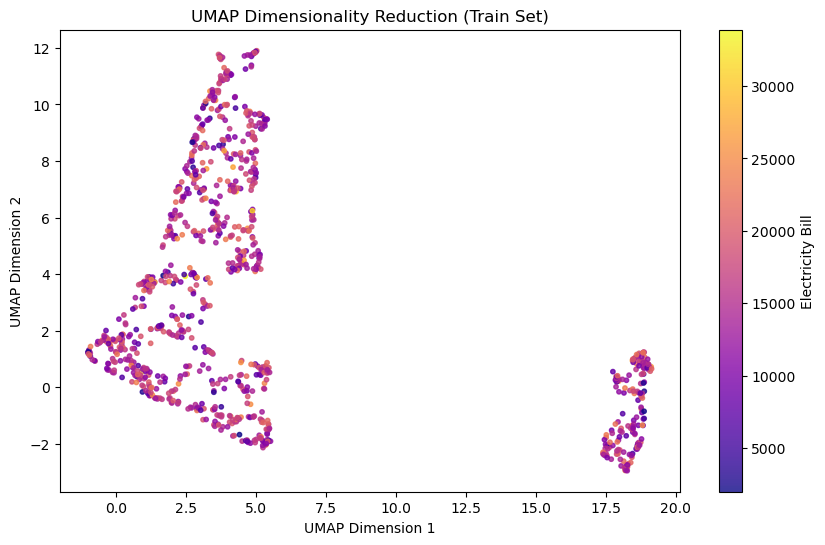

In [21]:
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)

umap_2d = umap.UMAP(n_components=2, init='random', random_state=42)

# normalising the training data
proj_2d = umap_2d.fit_transform(X_train)

plt.figure(figsize=(10, 6))
plt.scatter(proj_2d[:, 0], proj_2d[:, 1], c=Y_train, cmap='plasma', s=10, alpha=0.8)
plt.colorbar(label='Electricity Bill')
plt.title('UMAP Dimensionality Reduction (Train Set)')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.show()